<a href="https://colab.research.google.com/github/matsunagalab/tutorial_analyzingMDdata/blob/main/02_md_geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometry analysis

## MDTrajのインストール

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
!conda install -c conda-forge mdtraj

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2



# All requested packages already installed.



## T4 LysozymeのMDデータの取得

`wildtype.psf` と `wildtype.dcd` をダウンロードする。

In [4]:
!gdown 1GeXp7pbLO8nuK5L6x1xzxj1AX6kMnXy6
!gdown 1G_dnmdjgKFr-O8ciNo5JVR9iN4FQBAAE

Downloading...
From: https://drive.google.com/uc?id=1GeXp7pbLO8nuK5L6x1xzxj1AX6kMnXy6
To: /content/wildtype.psf
100% 623k/623k [00:00<00:00, 5.35MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G_dnmdjgKFr-O8ciNo5JVR9iN4FQBAAE
To: /content/wildtype.dcd
100% 215M/215M [00:01<00:00, 132MB/s]


## MDTrajを使ってgeometry analysis

Geometry関連の関数は[ドキュメント](https://www.mdtraj.org/1.9.7/analysis.html)から確認することができます。ここではいくつかを紹介します。

In [5]:
import mdtraj as md
import numpy as np

traj = md.load('/content/wildtype.dcd', top='/content/wildtype.psf')

原子間距離を計算します

In [18]:
dist.shape

(6768, 2)

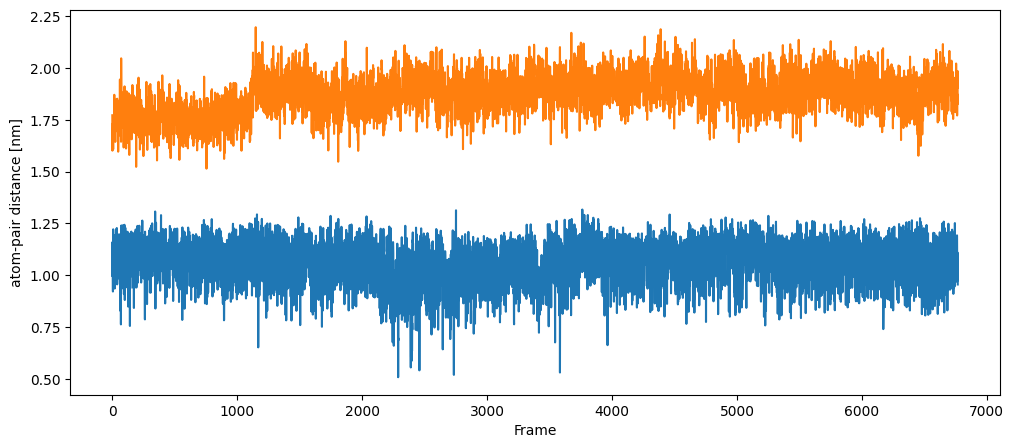

In [20]:
import matplotlib.pyplot as plt

dist = md.compute_distances(traj, [[0, 100], [0, 200]])

# Plot inter-domain distance
plt.figure(figsize=(12, 5))
plt.plot(dist)
plt.xlabel('Frame')
plt.ylabel('atom-pair distance [nm]')
plt.show()

ドメイン間の距離を計算します

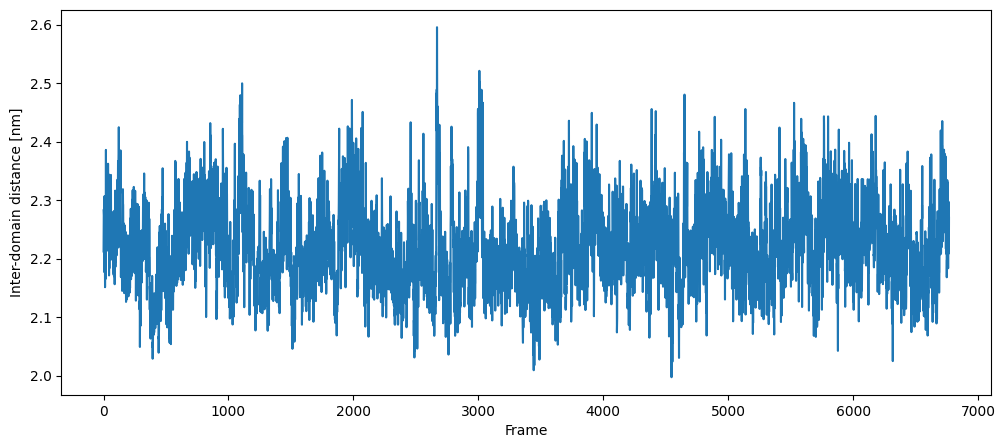

In [12]:
import matplotlib.pyplot as plt

# Define two domains using atom selections
domain1_indices = traj.topology.select('resSeq 1 to 50')
domain2_indices = traj.topology.select('resSeq 100 to 150')

# Compute centers of mass
domain1_com = md.compute_center_of_mass(traj.atom_slice(domain1_indices))
domain2_com = md.compute_center_of_mass(traj.atom_slice(domain2_indices))

# Calculate distance between centers of mass
com_distance = np.sqrt(np.sum((domain1_com - domain2_com)**2, axis=1))

# Plot inter-domain distance
plt.figure(figsize=(12, 5))
plt.plot(com_distance)
plt.xlabel('Frame')
plt.ylabel('Inter-domain distance [nm]')
plt.show()

トラジェクトリの一部における残基間のコンタクトの頻度を計算します

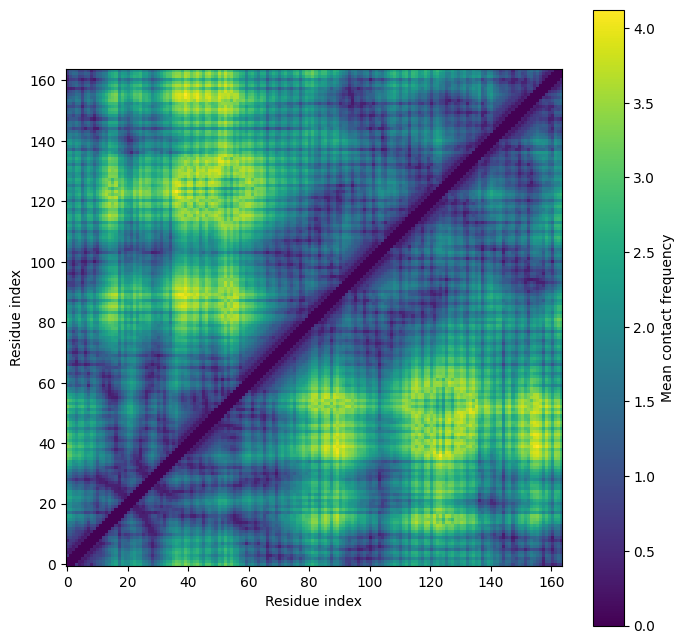

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the contact distances for each frame
distances, residue_pairs = md.compute_contacts(traj[:10], scheme='closest-heavy')

# Average over all frames to get the mean contact map
mean_distances = distances.mean(axis=0)

# Create an empty 2D array for the contact map
distance_map = np.zeros((traj.topology.n_residues, traj.topology.n_residues))

# Fill the contact map with the mean contacts
for (i, j), distance in zip(residue_pairs, mean_distances):
    distance_map[i, j] = distance
    distance_map[j, i] = distance

# Plot the contact map
plt.figure(figsize=(8, 8))
plt.imshow(distance_map, cmap='viridis', origin='lower')
plt.colorbar(label='Mean contact frequency')
plt.xlabel('Residue index')
plt.ylabel('Residue index')
plt.show()